# ELRC, European Language Resource Coordination
> Documents published on the European Parliament's official website

- toc: false
- badges: false
- comments: false
- categories: ELRC, translation, nmt, mt

### Available for Download  ✅
⚠️ Always check the license of the data source before using the data ⚠️
- Main page: [https://elrc-share.eu/](https://elrc-share.eu/)
- Data Browse Link: [https://elrc-share.eu/repository/search/](https://elrc-share.eu/repository/search/)
- Format: **.tmx**

### Brief Description

The ELRC-SHARE repository is used for documenting, storing, browsing and accessing Language Resources that are collected through the European Language Resource Coordination and considered useful for feeding the CEF Automated Translation (CEF.AT) platform.

### Other Notes
The files here are all hosted individually on ELRC and so have to be downloaded individually which requires a little patience. Let us know if there is a more efficient way to download them!

- No. source documents: 33
- Lines of text: 23,946 
- GA Word count: 485,570

### Word Count Distribution

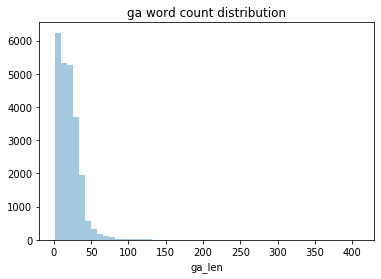

In [31]:
#hide_input
sns.distplot(ga_df.ga_len, kde=False)
plt.title('ga word count distribution');

### Code to Extract to a Pandas DataFrame

In [ ]:
#hide
from pathlib import Path
import pandas as pd
from tmx2dataframe import tmx2dataframe
from fastprogress.fastprogress import master_bar, progress_bar
import gc
import seaborn as sns
import matplotlib.pyplot as plt 

In [1]:
metadata, df = tmx2dataframe.read('elrc/citizens_information_en-ga.tmx')
print(len(df))
df.head()

10297


,source_language,source_sentence,target_language,target_sentence
0,en,about Citizens Information,ga,maidir le faisnéis do shaoránaigh
1,en,the Citizens Information Board is the statutor...,ga,is é an Bord um fhaisnéis do shaoránaigh ( BFS...
2,en,"it provides the Citizens Information website ,...",ga,cuireann sé an láithreán gréasáin um fhaisnéis...
3,en,it also funds and supports the Money Advice an...,ga,cuireann sé maoiniú agus tacaíocht ar fáil fre...
4,en,Citizensinformation.ie provides comprehensive ...,ga,cuireann citizensinformation.ie faisnéis chuim...


### Code to Interate and Extract all `.tmx` files downloaded

In [22]:
lang='ga'            
dir_path = Path(f'elrc') 
samp_count=0
for f in progress_bar(list(dir_path.iterdir())): 
    if f.suffix == '.tmx': 
        try:
            _, df = tmx2dataframe.read(str(f))
            # If target_language in dataframe contains the language string (like 'ga')
            df.target_language = df.target_language.str.lower()
            if len(df[df.target_language.str.contains(lang)]) > 0:
                ga_df = df[df.target_language.str.contains(lang)].copy()
                ga_df['filepath'] = str(f)
        except:pass
            #print(f"Couldn't open {f}") 

        var_exists = 'ga_df' in locals() or 'ga_df' in globals()
        if var_exists:
            #print(f'{len(ga_df)} samples found in {f}')
            samp_count+=len(ga_df)
            ga_df.reset_index(inplace=True, drop=True)
            ga_df.to_csv(f'{str(f).lower()}.csv')
            del ga_df
            gc.collect()
        #else: print(f'No {lang} text found in {f} ?')
        #print()
        
print(f'{samp_count} total text samples extracted')

34235 total text samples extracted


### Compile Saved CSVs

In [23]:
lang='ga'            
dir_path = Path(f'elrc') 

f_list = []
for f in list(dir_path.iterdir()):
    if f.suffix == '.csv': f_list.append(f)

for i,f in enumerate(progress_bar(f_list)): 
    try:
        if i == 0: ga_df = pd.read_csv(f, index_col=0)
        tmp = pd.read_csv(f, index_col=0)
        ga_df = pd.concat([ga_df, tmp])
    except:
        print(f'Error with opening {f}')

ga_df.reset_index(inplace=True, drop=True)
print(len(ga_df))
ga_df.to_csv('elrc_en-ga_compiled_2020-06-11.csv', index=False)
ga_df.head()

34243


,source_language,source_sentence,target_language,target_sentence,filepath
0,en,Press release31 March 2020Brussels,ga,"Preaseisiúint March 31, 2020An Bhruiséil",elrc/covid19_eu_presscorner_en-ga.tmx
1,en,State aid: Coronavirus: Irish Repayable Advanc...,ga,Státchabhair: An coróinvíreas: Scéim Réamhíoca...,elrc/covid19_eu_presscorner_en-ga.tmx
2,en,"(i) Direct grants, selective tax advantages an...",ga,"(i) an deontas díreach, buntáistí cánach roghn...",elrc/covid19_eu_presscorner_en-ga.tmx
3,en,"(i) Direct grants, equity injections, selectiv...",ga,"(i) Deontais dhíreacha, instealltaí cothromais...",elrc/covid19_eu_presscorner_en-ga.tmx
4,en,State aid_coronavirus_IrelandThe European Comm...,ga,Bearta tacaíochta na hÉireann,elrc/covid19_eu_presscorner_en-ga.tmx


Number source documents:

In [29]:
# hide_input
len(pd.DataFrame(ga_df.groupby('filepath').size().sort_values(ascending=False)))

33

Number of lines per source document:

In [30]:
# hide_input
pd.DataFrame(ga_df.groupby('filepath').size().sort_values(ascending=False))

,0
filepath,
elrc/citizens_information_en-ga.tmx,10297
elrc/Tuarascalaca_Bliantula_na_Roinne_Leanai_agus_Gnothai_Oige_en_ga_clean.tmx,2954
elrc/Tuarascail_Bhliantuil_Chomhairle_Chontae_Longfoirt_2017_en_ga_clean.tmx,2646
elrc/medical_domain_en-ga.tmx,1289
elrc/website_parallel_corpus_2259.en-ga.tmx,1134
elrc/Programme_for_Government_Annual_Report_2013_en_ga_clean.tmx,1020
elrc/Preasraitis_Gaois_Fiontar_Scoil_na_Gaeilge_DCU_1_en_ga_clean.tmx,975
elrc/Raitis_Airgeadais_Ollscoil_Mha_Nuad_2017-2018_en_ga_clean.tmx,677
elrc/Raitis_Airgeadais_Oifig_an_Choimisineara_Teanga_en_ga_clean.tmx,487
